In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\uphaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston

In [61]:
bost = load_boston()

In [62]:
boston = pd.DataFrame(bost.data,columns = bost.feature_names)

In [63]:
boston['price'] =bost.target

In [64]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [19]:
print(bost.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## List

1. Visualization
2. Outlier treatment
3. EDA
4. linear regression model to check score of raw
5. Assumptions of LR
6. Transformation of LR model if required
7. Assumptions again
8. Feature elimination/Engineering (RFE)
9. Regularization and Cross Validation
10. Pre-processing data - standard scaler
11. Linear model to check score
12. Other models

In [21]:
boston.isnull().sum().sum()

0

In [25]:
boston.head()
#CHAS is a categorical column
# AGE needs to be scaled
# Tax needs to be scaled
#B needs to be scaled
# Price is the target

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
boston.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

## Visualization

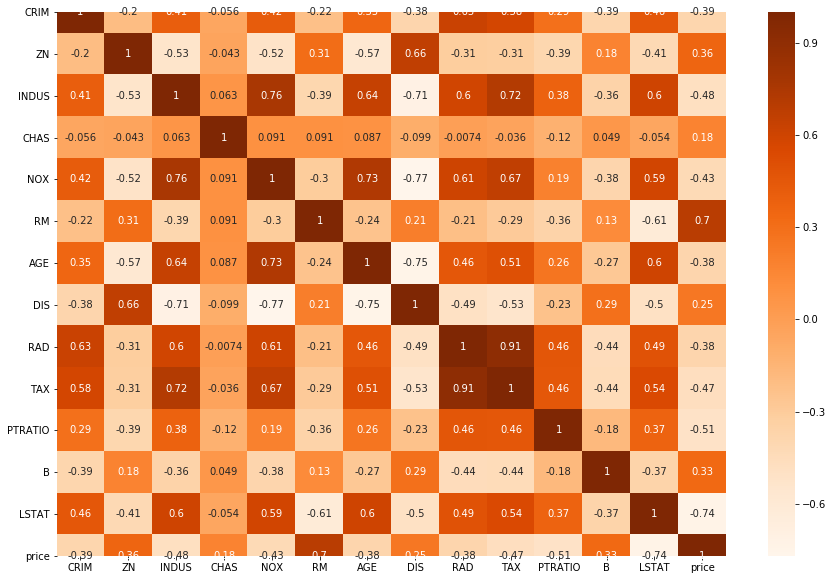

In [117]:
plt.figure(figsize=(15,10))
sns.heatmap(boston.corr(),annot = True,cmap = 'Oranges')
plt.show()

In [41]:
boston.corr()['price'].sort_values()
#From initial observations it seems that Lstat,ptratio,Rm are the strong co-relations used for predicting price
# TAX and RAD are highly corelated
#

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
price      1.000000
Name: price, dtype: float64

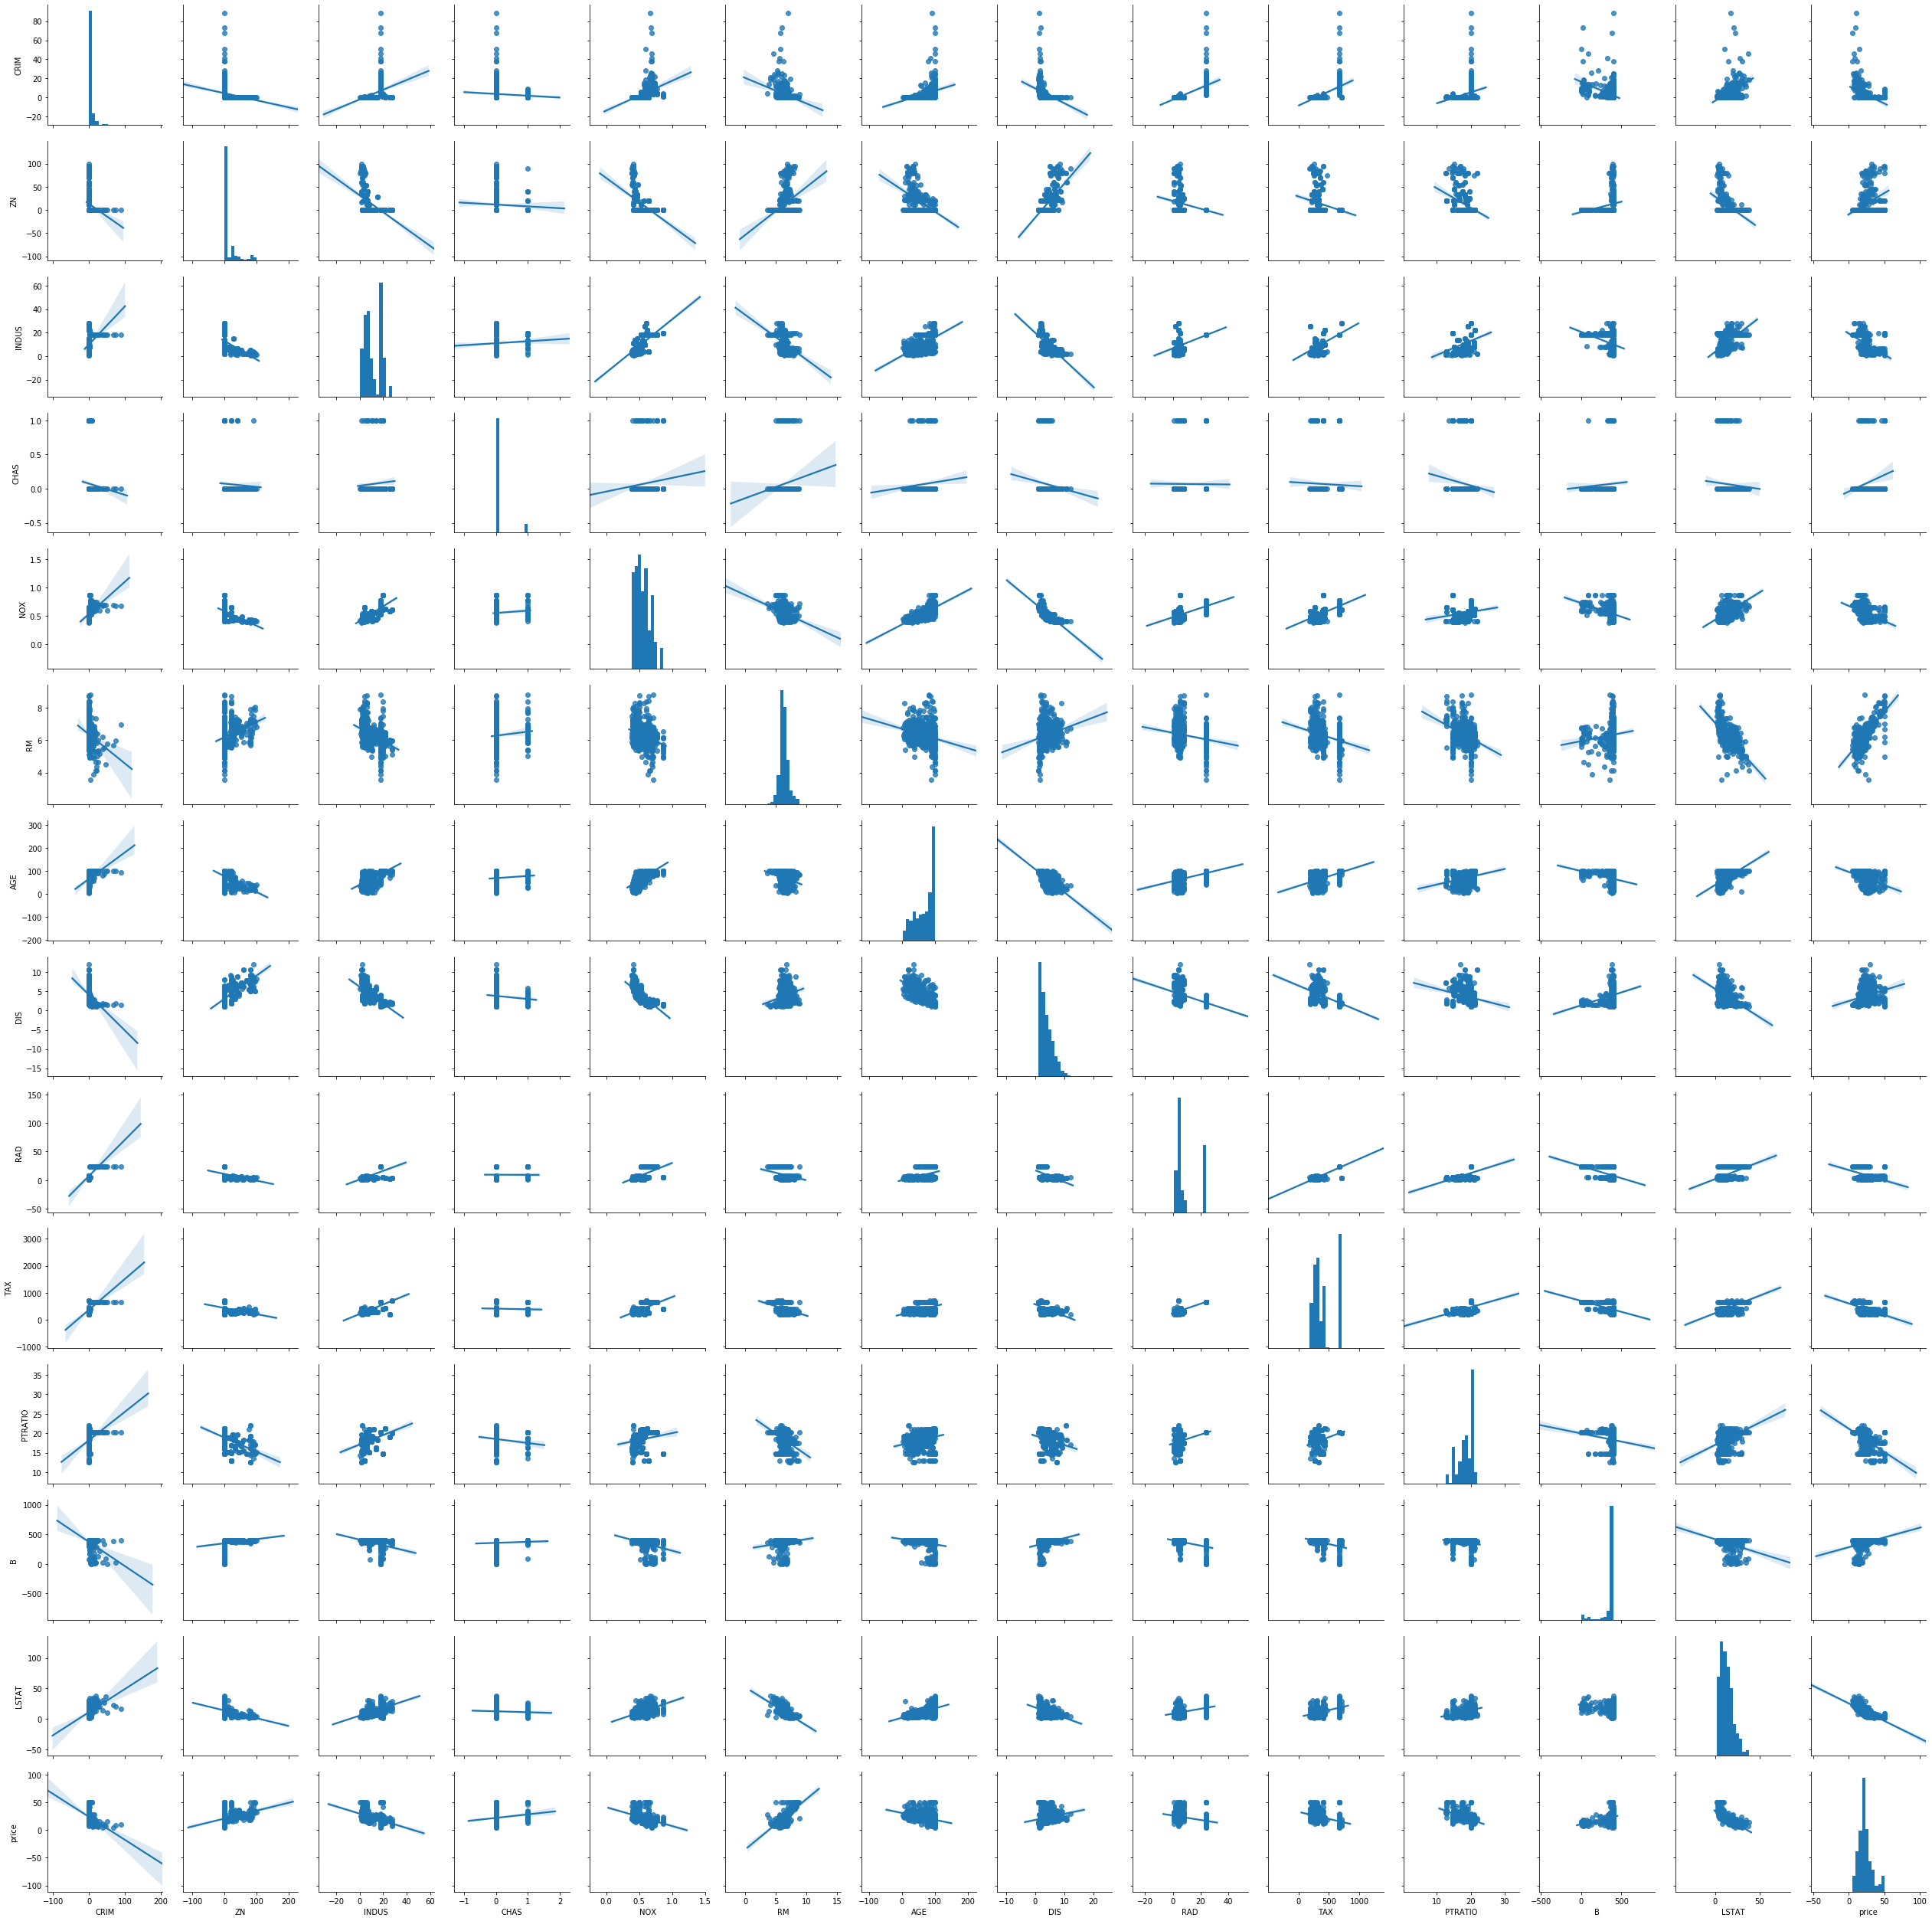

In [43]:
sns.pairplot(boston,kind = 'reg')

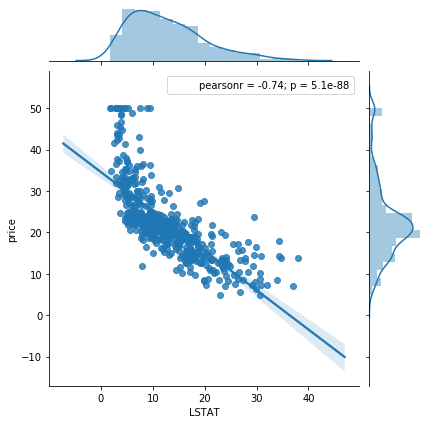

In [47]:
sns.jointplot(boston.LSTAT,boston.price,kind = 'reg').annotate(stats.pearsonr)
plt.show()

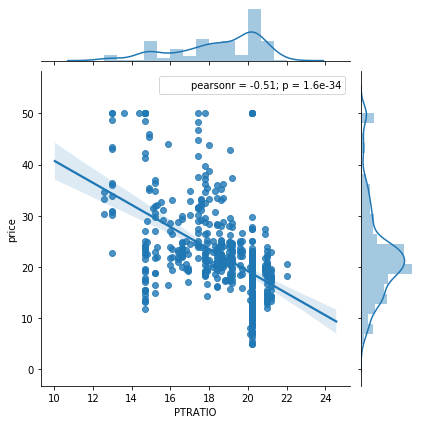

In [46]:
sns.jointplot(boston.PTRATIO,boston.price,kind = 'reg').annotate(stats.pearsonr)
plt.show()

C:\Users\uphaa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


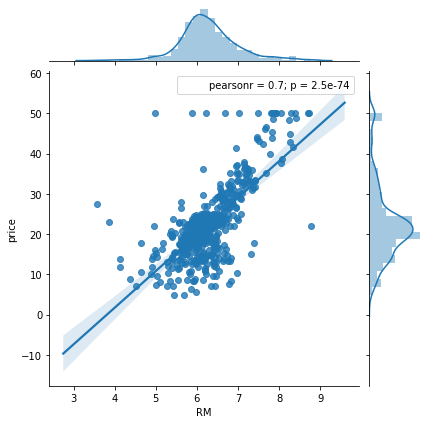

In [65]:
sns.jointplot(boston.RM,boston.price,kind = 'reg').annotate(stats.pearsonr)
plt.show()
#outlier treatment is required for RM

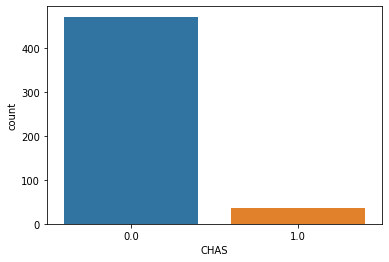

In [66]:
sns.countplot(boston.CHAS)

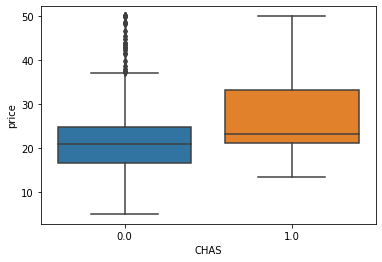

In [67]:
sns.boxplot(boston.CHAS,boston.price)

In [53]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Outlier treatment

In [56]:
def outlie(x):
    for i in boston.columns:
        q1 = boston[i].quantile(0.25)
        q3 = boston[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        x[i] = x[i][(x[i] >= lower) & (x[i] <= upper) ]
    return x

In [57]:
boston = outlie(boston)

### Raw Model building

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [81]:
X = boston.drop('price',axis = 1)
y = boston.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state =1)

## 1. Gradient Descent

In [167]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [168]:
print(f'The cofficients for the model are {linreg.coef_}\n')
print(f'The intercept is {linreg.intercept_}')


The cofficients for the model are [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]

The intercept is 46.39649387182395


In [169]:
linreg.score(X_test,y_test)

0.7836295385076268

In [170]:
linreg.score(X_train,y_train)

0.7103879080674731

### Since training model is giving more score than the test, means there is overfitting which needs to be reduced by either reducing dataset features

## 2. OLS

In [76]:
import statsmodels.api as sm

In [96]:
X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 16 Jun 2020   Prob (F-statistic):          6.72e-135
Time:                        15:48:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions

### 1. Multi-colinearity

Test to perform: Variance Inflation Factor (ViF)

Null Hypothesis: The features are not having multi-colinearity amongst themselves.

OLS model will be used to check, if vif value is 1 that means no multi-colinearity. However, as the value increases, multicolinearity exists

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
vif = [variance_inflation_factor(X_constant.values,i) for i in range(len(X_constant.columns))]

In [111]:
multi_df = pd.DataFrame({'vif':vif[1:]},index=X.columns)

In [112]:
multi_df.T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


#### Since CRIM,B is close to 1 rest all are greater than 1 hence multi-colinearity exists.
#### In addition, value should be less than 5 or else the error maximizes. Since RAD is > 5, this gives us intution to remove this variable. However we will check it and then remove.

### 2. Auto-correlation

Test to perform: Durbin-Watson test

null Hypothesis: The residuals should not be auto- correlated with each other

If the value obtained is equal to 2 - Then no Auto-correlation
If the value is 0-2 => Positive correlation
If the value is 2-4 => Negative correlation

In [118]:
from statsmodels.stats.api import durbin_watson

In [119]:
durbin_watson(model.resid)

1.0783751186797235

#### Since the value is less than 2 which means that a positive co-rrealtion exists.

### Visual test for Auto-correlation

Test name- IID (Independent and identical test).

It checks the acf (Auto-correlation factor) with respect to TSA (Time series analysis).
i.e. the value of y should not be correalted with the previous lags of values. 

If any pattern is observed,it means there is some auto-correlation


In [120]:
import statsmodels.tsa.api as smt

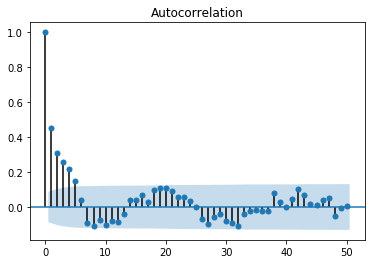

In [121]:
acf = smt.graphics.plot_acf(model.resid,lags= 50,alpha = 0.05)

#### From the above graph, it is clear that some pattern exists, hence auto-correlation exists

### 3. Normality

Test to perform: Jarque Bera

null hypotheis: The residuals are  normal in nature

The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test

In [122]:
from scipy.stats import jarque_bera

In [123]:
stats,pval = jarque_bera(model.resid)

In [124]:
print(stats,pval)

783.1262780507673 0.0


#### Since p value is 0,i.e. less than LOS therefore, reject the H0 and we can say that residuals are not normal


### Visual Test for Normality

Test name: QQ-PLOT

In [126]:
import pylab
import scipy.stats as stats

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

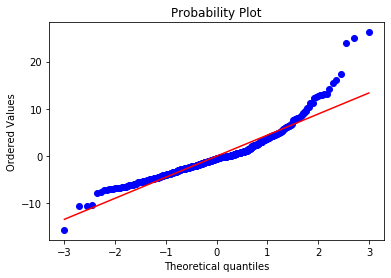

In [127]:
stats.probplot(model.resid,dist='norm',plot = pylab)

### 4. Residuals should be Homoscadastic in nature

Test performed: Goldfeldt- Quant

Null Hypothesis: Residuals should be homoscadastic in nature

In [128]:
from statsmodels.stats.api import het_goldfeldquandt

In [129]:
stats,pval,status = het_goldfeldquandt(model.resid,X)

In [130]:
print(stats,pval,status)

2.0495950097594604 1.9514311306133518e-08 increasing


#### Since p value is less than 0.05 therefore we will reject the null hypothesis and can say residuals are Hetroscadastic in nature

### 5. Linearity of residuals

Test to perform: Linear Rainbow test

null Hypothesis: The residuals are linear in nature

In [131]:
import statsmodels.api as sm

In [132]:
sm.stats.diagnostic.linear_rainbow(model)

(0.5808507639614254, 0.999988852262534)

#### Since p value is greater than LOS therefore we fail to reject null hypothesis i.e. residuals are linear in nature

### Graphical Test

Residplot

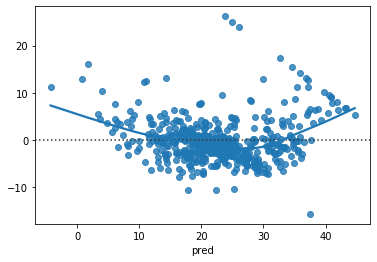

In [137]:
boston['pred'] = model.predict(X_constant)
sns.residplot(boston.pred,model.resid,lowess = True)

## Observations:

Since the assumptions are not met i.e. below
1. Multi-colinearity exists
2. There is Auto-correlation amongst residuals also
3. Residuals are not normally distributed
4. Residuals are hetroscadastic

Therefore, some other technique/transformation needs to be applied such that linear regression can be used.

## Log Transformation

In [252]:
boston_copy = boston.copy()

In [254]:
boston_copy = np.log(boston_copy)

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [258]:
boston_copy.drop('CHAS',1,inplace =True)

In [260]:
boston_copy['CHAS'] = boston.CHAS

In [264]:
boston_copy = boston_copy[boston.columns]

In [284]:
boston.ZN.max()

100.0

In [287]:
max1 = boston.ZN.max()
min1 = boston.ZN.min()
for x,y in boston.iterrows():
    boston_copy.loc[x,'ZN'] = (y['ZN'] - max1)/(max1 - min1)
    

### Applying Assumptions again

In [289]:
X = boston_copy.drop('price',1)
y= boston_copy.price

In [290]:
X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     126.5
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          1.76e-147
Time:                        21:59:01   Log-Likelihood:                 106.65
No. Observations:                 506   AIC:                            -185.3
Df Residuals:                     492   BIC:                            -126.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2356      0.437     11.974      0.000       4.377       6.095
CRIM          -0.0314      0.011     -2.813      0.005      -0.053      -0.009
ZN            -0.1148      0.058     -1.970      0.049      -0.229      -0.000
INDUS          0.0038      0.022      0.168      0.867      -0.040       0.048
CHAS           0.1012      0.036      2.793      0.005       0.030       0.172
NOX           -0.3659      0.107     -3.405      0.001      -0.577      -0.155
RM             0.3844      0.109      3.511      0.000       0.169       0.599
AGE            0.0411      0.022      1.837      0.067      -0.003       0.085
DIS           -0.1438      0.036     -4.039      0.000      -0.214      -0.074
RAD            0.0949      0.022      4.295      0.000       0.051       0.138
TAX           -0.1760      0.048     -3.684      0.000      -0.270      -0.082
PTRATIO       -0.5895      0.091     -6.460      0.000      -0.769      -0.410
B              0.0533      0.013      4.211      0.000       0.028       0.078
LSTAT         -0.4186      0.026    -16.224      0.000      -0.469      -0.368
==============================================================================
Omnibus:                       53.623   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.914
Skew:                          -0.313   Prob(JB):                     1.47e-54
Kurtosis:                       6.372   Cond. No.                         540.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = sm.OLS()

### Multi-colinearity

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
vif = [variance_inflation_factor(X_constant.values,i) for i in range(len(X_constant.columns))]

multi_df = pd.DataFrame({'vif':vif[1:]},index=X.columns)

multi_df.T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,7.467886,2.361928,3.88997,1.082522,5.992222,1.932761,2.382908,4.71865,4.776506,4.582498,1.658966,1.224797,3.072924


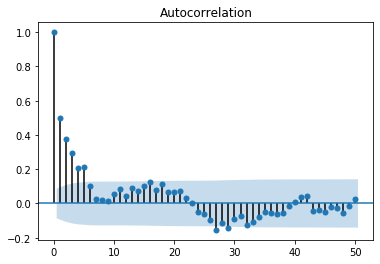

In [296]:
acf = smt.graphics.plot_acf(model.resid,lags= 50,alpha = 0.05)

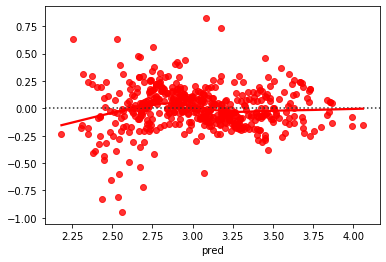

In [298]:
boston['pred'] = model.predict(X_constant)
sns.residplot(boston.pred,model.resid,lowess = True,color = 'r')

In [300]:
X = boston_copy.drop('price',axis = 1)
y = boston_copy.price
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state =1)

### RFE feature elimination

In [148]:
from sklearn.feature_selection import RFE

In [301]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
rfe = RFE(linreg,n_features_to_select= 6)

In [302]:
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)

In [303]:
rfe.score(X_test,y_test)

0.7414596940830607

In [304]:
rfe.score(X_train,y_train)

0.7296996756892459

In [305]:
rfe.ranking_

array([7, 1, 8, 1, 1, 1, 6, 2, 4, 3, 1, 5, 1])

In [306]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [307]:
lis = list(zip(rfe.ranking_,X_train.columns))

In [308]:
for x,y in enumerate(lis):
    if (y[0] == 1):
        print(f'Ranked 1 features are {y[1]}')
    else:
        continue

Ranked 1 features are ZN
Ranked 1 features are CHAS
Ranked 1 features are NOX
Ranked 1 features are RM
Ranked 1 features are PTRATIO
Ranked 1 features are LSTAT


## Regularization

### 1. Ridge 

In [201]:
from sklearn.linear_model import Ridge,RidgeCV

In [309]:
ridge = Ridge(alpha = 0.01)

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

In [310]:
r2_score(y_test,y_pred)

0.7917388298452774

In [311]:
ridge.score(X_train,y_train)

0.7542765673369624

### RidgeCV

In [312]:
rcv = RidgeCV()

rcv.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

In [313]:
rcv.score(X_test,y_test)

0.7916507713265004

### 2. Lasso CV

In [214]:
from sklearn.linear_model import Lasso,LassoCV

In [347]:
lasso = LassoCV()

lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [343]:
lasso.score(X_test,y_test)

0.7872821034477607

### How to choose the hyper-parameter alpha

In [345]:
lis = [0.001,0.003,0.01,0.03,0.1]
main = []
for alpha in lis:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    main.append(lasso.score(X_test,y_test))

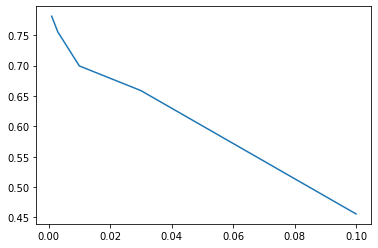

In [317]:
plt.plot(lis,main)

In [348]:
lasso_coef = lasso.fit(X_train,y_train).coef_

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [349]:
lasso_coef

array([-0.03340717, -0.06554445,  0.00398932,  0.12028934, -0.31272996,
        0.15464357,  0.04399535, -0.11905276,  0.0779316 , -0.10568311,
       -0.53526388,  0.04315153, -0.45045811])

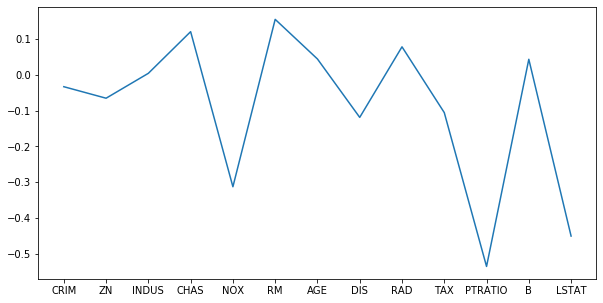

In [350]:
plt.figure(figsize = (10,5))
plt.plot(X_train.columns,lasso_coef)

### Elastic Net

In [320]:
from sklearn.linear_model import ElasticNet

In [321]:
enet = ElasticNet(alpha = 0.01)

enet.fit(X_train,y_train)
y_pred = enet.predict(X_test)

In [322]:
enet.score(X_test,y_test)

0.7275639705591015

## Other models

In [323]:
from sklearn.tree import DecisionTreeRegressor

In [354]:
X = boston.drop('price',1)
y = boston.price

In [355]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size = 0.3)

In [379]:
dtr = DecisionTreeRegressor(max_depth= 4,random_state=1)

In [380]:
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [381]:
dtr.score(X_test,y_test)

0.8646893116543823

In [360]:
r2_score(y_test,y_pred)

0.8646893116543823

## Grid Search


In [361]:
from sklearn.model_selection import GridSearchCV

In [364]:
param = {'max_depth': np.arange(1,20)}
dt = DecisionTreeRegressor()
dt_cv = GridSearchCV(estimator = dt,param_grid = param,cv = 5)

In [365]:
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [366]:
dt_cv.best_params_

{'max_depth': 5}

In [367]:
dt_cv.best_score_

0.7448914537127342

## Gradient Boosting

In [382]:
from sklearn.ensemble import GradientBoostingRegressor

In [383]:
gdbr = GradientBoostingRegressor()
gdbr.fit(X_train,y_train)
y_pred = gdbr.predict(X_test)

In [384]:
r2_score(y_test,y_pred)

0.9226025506306574

## Standard Scaler

In [386]:
from sklearn.preprocessing import StandardScaler

In [389]:
scaler = StandardScaler()
boston_scaled = pd.DataFrame(scaler.fit_transform(boston),columns = boston.columns)

In [391]:
X = boston_scaled.drop('price',1)
y = boston_scaled.price
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size = 0.3)

In [392]:
gdbr = GradientBoostingRegressor()
gdbr.fit(X_train,y_train)
y_pred = gdbr.predict(X_test)

In [393]:
r2_score(y_test,y_pred)

0.9231843726351129

## XGBoost

In [394]:
from xgboost import XGBRegressor

In [395]:
xgbr = XGBRegressor(objective = 'reg:linear',n_estimators = 10,seed = 1)

In [396]:
xgbr.fit(X_train,y_train)
y_pred = xgbr.predict(X_test)

r2_score(y_test,y_pred)

[17:23:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


0.8712002149763495